In [171]:
import numpy as np
import math
import random as r
import matplotlib.pyplot as plt

In [180]:
class Cell:
    def __init__(self, infecting_phages):
        self.phage = infecting_phages
        
    def get_phages(self):
        return 600

In [181]:
class CellSection:

    def __init__(self, cells, phages):
        self.phage = phages
        self.cell_clean = cells
        self.cell_infected = 0
        self.cell_dead = 0
        self.cells = []
        self.infect_cells()

    def infect_cells(self):
        m = self.phage / (self.cell_clean + self.cell_infected)
        if m < 100:
            infecting_phages = np.random.poisson(m, self.cell_clean)
        else:
            infecting_phages = np.random.normal(m, m ** 1/2, self.cell_clean)
      #  print(infecting_phages)
        for infecting_phage in infecting_phages:
            if infecting_phage > 0:
                self.cell_clean -= 1
                self.cell_infected += 1
                if infecting_phage >= self.phage:
                    infecting_phage = self.phage
                    self.cells.append(Cell(infecting_phage))
                    self.phage -= infecting_phage
                    break
                else:
                    self.cells.append(Cell(infecting_phage))
                    self.phage -= infecting_phage

    def update_time(self):
        self.cell_dead += self.cell_infected
        self.cell_infected = 0
        self.cell_clean = 8 * self.cell_clean # lysis time is ~1hr, e coli reproduces in 20min
        for i in range(len(self.cells)):
            new_phages = self.cells[i].get_phages()
            self.phage += new_phages
            self.cell_dead += 1
        self.cells = []
        self.infect_cells()
    
    def debug_display(self):
        print('#phages: ' + str(self.phage))
        print('#healthy cells: ' + str(self.cell_clean))
        print('#infected cells: ' + str(self.cell_infected))
        print('#dead cells: ' + str(self.cell_dead))
       # for cell in self.cells:
        #    print(cell.phage)


In [198]:
cs = CellSection(cells = 100, phages = 1000000)
cs.debug_display()
for i in range(10):
    cs.update_time()
    cs.debug_display()

#phages: 5897.641800907775
#healthy cells: 3
#infected cells: 97
#dead cells: 0
#phages: 899.7268517953257
#healthy cells: 0
#infected cells: 24
#dead cells: 194
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242
#phages: 15299.726851795325
#healthy cells: 0
#infected cells: 0
#dead cells: 242


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


Text(0.5, 1.0, 'moi = 1')

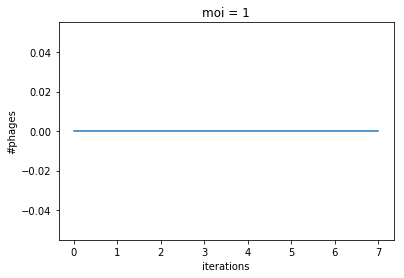

In [175]:
cells = [35, 280, 2240, 17920, 143360, 1146880, 9175040, 73400320]
phages = [0, 0, 0, 0, 0, 0, 0, 0]
plt.plot(phages)
plt.xlabel('iterations')
plt.ylabel('#phages')
plt.title('moi = 1')